## Dependencies

In [1]:
# Imports 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import json
import requests
import pymongo
from pymongo import MongoClient

## Reading CVS File and Converting to Data Frame

In [2]:
# Established File Path
path = "data/world-happiness-report-2021.csv"

# Read World Happiness Data Using File Path
df = pd.read_csv(path)

df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
# Inspected Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [4]:
# Inspected Columns
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

## Transform Data

In [5]:
# Removed Various Columns 
df1 = df.drop(columns = [
                            "Standard error of ladder score", 
                            "upperwhisker",
                            "lowerwhisker",
                            "Ladder score in Dystopia",
                            "Explained by: Log GDP per capita",
                            "Explained by: Social support",
                            "Explained by: Healthy life expectancy",
                            "Explained by: Freedom to make life choices",
                            "Explained by: Generosity",
                            "Explained by: Perceptions of corruption",
                            "Dystopia + residual"
                            ]
                             )
df1.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [6]:
# Renamed Various Columns for Conciseness
df2 = df1.rename(columns={
                        "Country name": "Country", 
                        "Regional indicator": "Region", 
                        "Ladder score": "Score", 
                        "Logged GDP per capita": "GDP per Capita", 
                        "Social support": "Social Support",
                        "Healthy life expectancy": "Healthy Life Expectancy",
                        "Freedom to make life choices": "Freedom of Choice",
                        "Perceptions of corruption": "Perception of Corruption"
                        }
                        )

df2.head()

,Country,Region,Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom of Choice,Generosity,Perception of Corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [7]:
# Counted Rows in Data Frame
rank_data = list(range(len(df2)))

# Added "Rank" to Columns with Ranking for Each Country
df2['Rank'] = rank_data

# Made "Rank" Begin at "1" Instead of "0"
df2.Rank += 1 

df2.head()

,Country,Region,Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom of Choice,Generosity,Perception of Corruption,Rank
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,1
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,3
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,4
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,5


In [8]:
# Reordered Columns
df3 = df2[
            ['Country', 
             'Region', 
             'Rank', 
             'Score', 
             'GDP per Capita', 
             'Social Support', 
             'Healthy Life Expectancy', 
             'Freedom of Choice',
             'Generosity', 
             'Perception of Corruption' 
            ]
            ]

df3.head(10)

,Country,Region,Rank,Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom of Choice,Generosity,Perception of Corruption
0,Finland,Western Europe,1,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,2,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,3,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,4,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,5,7.464,10.932,0.942,72.4,0.913,0.175,0.338
5,Norway,Western Europe,6,7.392,11.053,0.954,73.3,0.960,0.093,0.270
6,Sweden,Western Europe,7,7.363,10.867,0.934,72.7,0.945,0.086,0.237
7,Luxembourg,Western Europe,8,7.324,11.647,0.908,72.6,0.907,-0.034,0.386
8,New Zealand,North America and ANZ,9,7.277,10.643,0.948,73.4,0.929,0.134,0.242
9,Austria,Western Europe,10,7.268,10.906,0.934,73.3,0.908,0.042,0.481


In [9]:
# Renamed rows in "Country"
df4 = df3.replace("United States", "United States of America")

df5 = df4.replace("Tanzania", "United Republic of Tanzania") 

df6 = df5.replace("Congo (Brazzaville)", "Republic of Congo")                   

df7 = df6.replace("Congo (Kinshasa)", "Democratic Republic of the Congo")

df8 = df7.replace("Hong Kong S.A.R. of China", "Hong Kong S.A.R.")

df9 = df8.replace("Palestinian Territories", "Palestine")

df10 = df9.replace("Taiwan Province of China", "Taiwan")

df11 = df10.replace("North Macedonia", "Macedonia")

df12 = df11.replace("Serbia", "Republic of Serbia")

df13 = df12.replace("North Cyprus", "Northern Cyprus")

# display
for country in df10["Country"]:
    print(country)

Finland
Denmark
Switzerland
Iceland
Netherlands
Norway
Sweden
Luxembourg
New Zealand
Austria
Australia
Israel
Germany
Canada
Ireland
Costa Rica
United Kingdom
Czech Republic
United States of America
Belgium
France
Bahrain
Malta
Taiwan
United Arab Emirates
Saudi Arabia
Spain
Italy
Slovenia
Guatemala
Uruguay
Singapore
Kosovo
Slovakia
Brazil
Mexico
Jamaica
Lithuania
Cyprus
Estonia
Panama
Uzbekistan
Chile
Poland
Kazakhstan
Romania
Kuwait
Serbia
El Salvador
Mauritius
Latvia
Colombia
Hungary
Thailand
Nicaragua
Japan
Argentina
Portugal
Honduras
Croatia
Philippines
South Korea
Peru
Bosnia and Herzegovina
Moldova
Ecuador
Kyrgyzstan
Greece
Bolivia
Mongolia
Paraguay
Montenegro
Dominican Republic
North Cyprus
Belarus
Russia
Hong Kong S.A.R.
Tajikistan
Vietnam
Libya
Malaysia
Indonesia
Republic of Congo
China
Ivory Coast
Armenia
Nepal
Bulgaria
Maldives
Azerbaijan
Cameroon
Senegal
Albania
North Macedonia
Ghana
Niger
Turkmenistan
Gambia
Benin
Laos
Bangladesh
Guinea
South Africa
Turkey
Pakistan
Morocco

In [10]:
# Printed entire dataframe to inspect if the entries in the "Region" column were correct
print(df13.to_string())

                         Country                              Region  Rank  Score  GDP per Capita  Social Support  Healthy Life Expectancy  Freedom of Choice  Generosity  Perception of Corruption
0                        Finland                      Western Europe     1  7.842          10.775           0.954                   72.000              0.949      -0.098                     0.186
1                        Denmark                      Western Europe     2  7.620          10.933           0.954                   72.700              0.946       0.030                     0.179
2                    Switzerland                      Western Europe     3  7.571          11.117           0.942                   74.400              0.919       0.025                     0.292
3                        Iceland                      Western Europe     4  7.554          10.878           0.983                   73.000              0.955       0.160                     0.673
4                   

In [11]:
# Changed countries to appropriate "Region".
df13.iloc[8,1] = 'AUS and NZ'  # New Zealand
df13.iloc[10,1] = 'AUS and NZ' # Australia
df13.iloc[13,1] = 'North America' # Canada
df13.iloc[18,1] = 'North America' # United States of America
df13.iloc[35,1] = 'North America' # Mexico
print(df13.to_string())

                         Country                              Region  Rank  Score  GDP per Capita  Social Support  Healthy Life Expectancy  Freedom of Choice  Generosity  Perception of Corruption
0                        Finland                      Western Europe     1  7.842          10.775           0.954                   72.000              0.949      -0.098                     0.186
1                        Denmark                      Western Europe     2  7.620          10.933           0.954                   72.700              0.946       0.030                     0.179
2                    Switzerland                      Western Europe     3  7.571          11.117           0.942                   74.400              0.919       0.025                     0.292
3                        Iceland                      Western Europe     4  7.554          10.878           0.983                   73.000              0.955       0.160                     0.673
4                   

In [12]:
# Grouped by Region and determined mean
region_df = df13.groupby(["Region"]).mean()

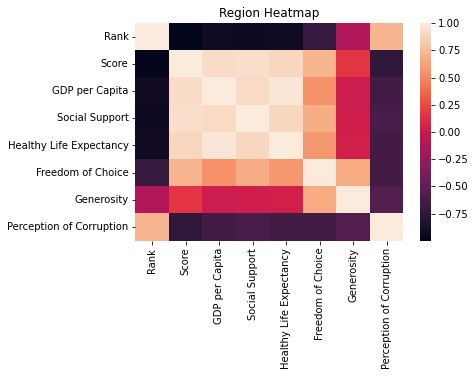

In [13]:
# Created heatmap to determine correlations of regional averages 
sns.heatmap(region_df.corr());
plt.title('Region Heatmap')
plt.show()

In [14]:
# Loaded data as json
url = 'https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson'
resp = requests.get(url)
data = json.loads(resp.text)
#print(data['features'][0])

# Created lists to recreated database to convert geometry entries to objects
countries = []
iso_a3 = []
iso_a2 = []
geometry = []

for row in data["features"]:
    countries.append(row["properties"]["ADMIN"])
    iso_a3.append(row["properties"]["ISO_A3"])
    iso_a2.append(row["properties"]["ISO_A2"])
    geometry.append(row["geometry"])

geodata = pd.DataFrame({
    "ADMIN": countries,
    "ISO_A3": iso_a3,
    "ISO_A2": iso_a2,
    "geometry": geometry
})

geodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ADMIN     255 non-null    object
 1   ISO_A3    255 non-null    object
 2   ISO_A2    255 non-null    object
 3   geometry  255 non-null    object
dtypes: object(4)
memory usage: 8.1+ KB


In [15]:
# Renamed Various Columns for Conciseness
geodata1 = geodata.rename(columns={
                        "ADMIN": "Country", 
                        "geometry": "Geometry", 
                        }
                        )
geodata1.head()

,Country,ISO_A3,ISO_A2,Geometry
0,Aruba,ABW,AW,"{'type': 'MultiPolygon', 'coordinates': [[[[-6..."
1,Afghanistan,AFG,AF,"{'type': 'MultiPolygon', 'coordinates': [[[[71..."
2,Angola,AGO,AO,"{'type': 'MultiPolygon', 'coordinates': [[[[11..."
3,Anguilla,AIA,AI,"{'type': 'MultiPolygon', 'coordinates': [[[[-6..."
4,Albania,ALB,AL,"{'type': 'MultiPolygon', 'coordinates': [[[[19..."


In [16]:
# Printed countries to determine discrepancies in country names between the two dataframes 
for country in geodata1["Country"]:
    print(country)

Aruba
Afghanistan
Angola
Anguilla
Albania
Aland
Andorra
United Arab Emirates
Argentina
Armenia
American Samoa
Antarctica
Ashmore and Cartier Islands
French Southern and Antarctic Lands
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
Bahrain
The Bahamas
Bosnia and Herzegovina
Bajo Nuevo Bank (Petrel Is.)
Saint Barthelemy
Belarus
Belize
Bermuda
Bolivia
Brazil
Barbados
Brunei
Bhutan
Botswana
Central African Republic
Canada
Switzerland
Chile
China
Ivory Coast
Clipperton Island
Cameroon
Cyprus No Mans Area
Democratic Republic of the Congo
Republic of Congo
Cook Islands
Colombia
Comoros
Cape Verde
Costa Rica
Coral Sea Islands
Cuba
Curaçao
Cayman Islands
Northern Cyprus
Cyprus
Czech Republic
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Dhekelia Sovereign Base Area
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Islands
France
Faroe Islands
Federated States of Micronesia
Gabon
United Kingdom
Georgia
Guer

In [17]:
# Merged world happiness dataset and geojson dataset, while including all countries' geometrical coordinates 
world_happiness_df = df13.merge(geodata1, on='Country', how='outer')
world_happiness_df.head()

,Country,Region,Rank,Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom of Choice,Generosity,Perception of Corruption,ISO_A3,ISO_A2,Geometry
0,Finland,Western Europe,1.0,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,FIN,FI,"{'type': 'MultiPolygon', 'coordinates': [[[[22..."
1,Denmark,Western Europe,2.0,7.620,10.933,0.954,72.7,0.946,0.030,0.179,DNK,DK,"{'type': 'MultiPolygon', 'coordinates': [[[[11..."
2,Switzerland,Western Europe,3.0,7.571,11.117,0.942,74.4,0.919,0.025,0.292,CHE,CH,"{'type': 'MultiPolygon', 'coordinates': [[[[8...."
3,Iceland,Western Europe,4.0,7.554,10.878,0.983,73.0,0.955,0.160,0.673,ISL,IS,"{'type': 'MultiPolygon', 'coordinates': [[[[-2..."
4,Netherlands,Western Europe,5.0,7.464,10.932,0.942,72.4,0.913,0.175,0.338,NLD,NL,"{'type': 'MultiPolygon', 'coordinates': [[[[-6..."


In [18]:
# Determined entries
world_happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 0 to 254
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   255 non-null    object 
 1   Region                    149 non-null    object 
 2   Rank                      149 non-null    float64
 3   Score                     149 non-null    float64
 4   GDP per Capita            149 non-null    float64
 5   Social Support            149 non-null    float64
 6   Healthy Life Expectancy   149 non-null    float64
 7   Freedom of Choice         149 non-null    float64
 8   Generosity                149 non-null    float64
 9   Perception of Corruption  149 non-null    float64
 10  ISO_A3                    255 non-null    object 
 11  ISO_A2                    255 non-null    object 
 12  Geometry                  255 non-null    object 
dtypes: float64(8), object(5)
memory usage: 27.9+ KB


In [19]:
# Determined which rows data fields were empty
world_happiness_df.isna()

,Country,Region,Rank,Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom of Choice,Generosity,Perception of Corruption,ISO_A3,ISO_A2,Geometry
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,False,True,True,True,True,True,True,True,True,True,False,False,False
251,False,True,True,True,True,True,True,True,True,True,False,False,False
252,False,True,True,True,True,True,True,True,True,True,False,False,False
253,False,True,True,True,True,True,True,True,True,True,False,False,False


In [20]:
# Filled various null fields with "0"
world_happiness_df['Rank'] = world_happiness_df['Rank'].fillna(0)
world_happiness_df['Score'] = world_happiness_df['Score'].fillna(0)
world_happiness_df['GDP per Capita'] = world_happiness_df['GDP per Capita'].fillna(0)
world_happiness_df['Social Support'] = world_happiness_df['Social Support'].fillna(0)
world_happiness_df['Healthy Life Expectancy'] = world_happiness_df['Healthy Life Expectancy'].fillna(0)
world_happiness_df['Freedom of Choice'] = world_happiness_df['Freedom of Choice'].fillna(0)
world_happiness_df['Generosity'] = world_happiness_df['Generosity'].fillna(0)
world_happiness_df['Perception of Corruption'] = world_happiness_df['Perception of Corruption'].fillna(0)
world_happiness_df.isna()

,Country,Region,Rank,Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom of Choice,Generosity,Perception of Corruption,ISO_A3,ISO_A2,Geometry
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,False,True,False,False,False,False,False,False,False,False,False,False,False
251,False,True,False,False,False,False,False,False,False,False,False,False,False
252,False,True,False,False,False,False,False,False,False,False,False,False,False
253,False,True,False,False,False,False,False,False,False,False,False,False,False


## Imported Data Frame into MongoDB

In [21]:
#Created MongoDB server and database
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
world_happiness_db = myclient["world_happiness"]

In [22]:
#Created collection within database
world_happiness_col = world_happiness_db["world_happiness_data"]

In [23]:
#Inserted dataframe into collection
world_happiness_df.set_index("Country")
data_dict = world_happiness_df.to_dict("records")
data_dict
world_happiness_col.insert_many(data_dict)